Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [366]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt


def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [367]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

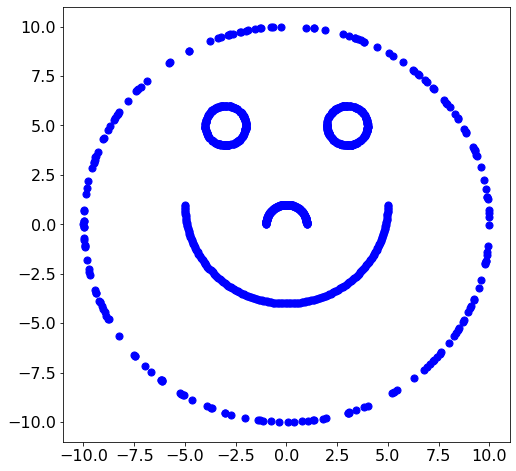

In [368]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]


## Import some additional files

In [369]:
import matplotlib.colors as mcolors

## Implementation of k-means

In [370]:
def kmeans(X, k, init, n_iter):
    '''
    This function performs the k-means clustering on the input data.
    Inputs:
        X: Input data
        k: Number of assumed clusters (a hyperparameter)
        init: Initial centroids
        n_iter: Number of iterations to run on it
    Output:
        cluster_centers: Final coordinates of cluster centers
        z: Index of cluster center for each data point
    '''

    # Initialize cluster centers
    cluster_centers = init

    for _ in range(n_iter):
        
        # Find the closest centroid for each data point and add to 'z' array
        z = np.zeros((X.shape[0]))
        for i, x in enumerate(X):
            # The cluster center assigned to this data point is calculated by finding
            # distance from all cluster centers and then finding the index of the closest cluster center 
            z[i] = np.argmin(np.linalg.norm((x - cluster_centers), axis=1))

        # Update the centroids (cluster centers)
        for i in range(len(cluster_centers)):
            # If the number of data points assigned to this cluster center is not 0
            # then update the cluster center to the mean of all data points assigned to it
            if(z[z==i].size>0):
                cluster_centers[i, :] = np.mean(X[z==i, :], axis=0)

    return cluster_centers, z

## Run k-means and Visualize

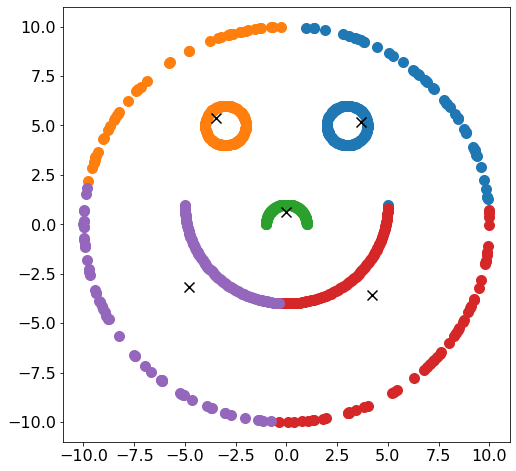

In [374]:
# Run k-means for some k value and visualize the output
k = 5
# Initialize cluster centers randomly
init = np.random.rand(k, X.shape[1])
# Run k-means
cluster_centers, z = kmeans(X, k, init, n_iter=1000)

# Plot each cluster with different colors
fig = getFigure(8, 8)
for i in range(k):
    plot2D(X[z==i], fig, color=list(mcolors.TABLEAU_COLORS)[i], marker='o')
# Plot the initial cluster centers
plot2D(cluster_centers, fig, color='black', marker='x')

## Implement k-means++ Initialization

In [375]:
def kmeanspp_init(X, k):
    '''This function initializes cluster centers for k-means++.
    '''

    # Initialize all centroids with 0
    init = np.zeros((k, X.shape[1]))

    # One of the cluster center is assigned value of a randomly selected data sample
    init[0, :] = X[np.random.randint(0, X.shape[0]-1), :]

    # Run for k steps
    for t in range(1, k):

        # We will calculate distance of each data point from the cluster centers that have been initialized till now
        dist = np.zeros((X.shape[0]))
        for i, x in enumerate(X):
            dist[i] = np.min(np.linalg.norm(x - init[0:t, :], axis=1))

        # Select the next cluster center uniformly based on probability proportional to distance calculated above
        prob = dist/np.sum(dist)
        prob[prob<1e-10] = 0  # Below a certain tolerance value we would like prob to be 0
        init[t, :] = X[np.random.choice(np.arange(X.shape[0]), p=prob), :]
    
    return init

# Run with k-means++ Initialization and Visualize

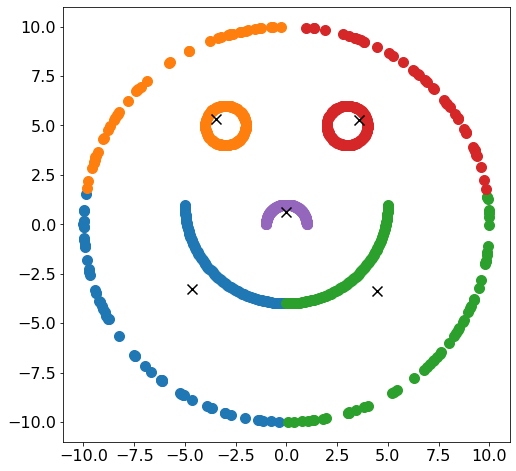

In [376]:
# Run k-means with k-means++ initialization for some k value and visualize the output
k = 5
# Initialize cluster centers using k-means++
init = kmeanspp_init(X, k)
# Run k-means
cluster_centers, z = kmeans(X, k, init, n_iter=1000)

# Plot each cluster with different colors
fig = getFigure(8, 8)
for i in range(k):
    plot2D(X[z==i], fig, color=list(mcolors.TABLEAU_COLORS)[i], marker='o')
# Plot the initial cluster centers
plot2D(cluster_centers, fig, color='black', marker='x')

## Find the best k using elbow method

In [377]:
def kmeans_loss(X, cluster_centers, z):
    '''This function calculates the loss by summing up distances of centroids from the assigned datapoints to them
    '''

    loss = 0

    # For each cluster center, calculate sum of distances between each data points and its assigned cluster
    for (i, centroid) in enumerate(cluster_centers):
        loss += np.sum(np.linalg.norm(centroid - X[z==i, :], axis=1))

    return loss

In [ ]:
# Run k-means for various k values and record the loss
loss = list()
for k in range(1, 10):
    # Initialize cluster centers using k-means++
    init = kmeanspp_init(X, k)
    # Run k-means
    cluster_centers, z = kmeans(X, k, init, n_iter=1000)
    # Calculate k-means loss
    loss.append(kmeans_loss(X, cluster_centers, z))


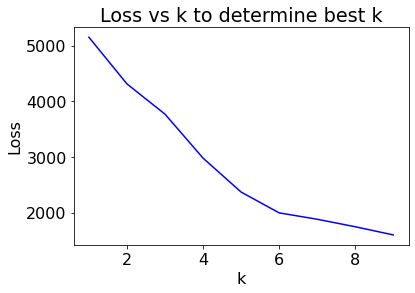

In [380]:
# Plot the graph of 'loss' vs 'k'
plt.plot(np.arange(1, 10, 1), loss, color='blue')
plt.title('Loss vs k to determine best k')
plt.xlabel('k')
plt.ylabel('Loss')
plt.show()

## Based on the above graph, it is clear that k = 5 and 6 are the best values for k

(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

# Transform the input data X to run the kernalized k-means

(1000, 2) (1000, 1000)


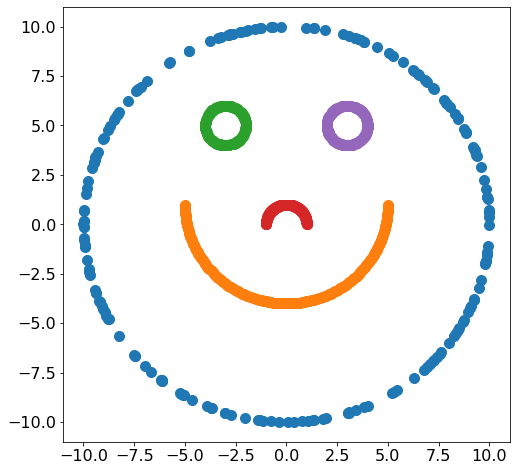

In [381]:
def gaussian_kernel(X):
    '''This function will transform the input data into a kernalized data matrix'''
    g = 1/(np.std(X)**2)
    return np.array([np.exp(-g*np.linalg.norm(X - X[i], axis=1)**2) for i in range(X.shape[0])])

# Run k-means with k-means++ initialization for some k value and visualize the output
k = 5
# Transform the input space using kernel function
X_transformed = gaussian_kernel(X)
# Initialize cluster centers using k-means++
init = kmeanspp_init(X_transformed, k)
print(X.shape, X_transformed.shape)
# Run k-means
cluster_centers, z = kmeans(X_transformed, k, init, n_iter=100)

# Plot each cluster with different colors
fig = getFigure(8, 8)
for i in range(k):
    plot2D(X[z==i], fig, color=list(mcolors.TABLEAU_COLORS)[i], marker='o')

### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

## Derivation of EM algorithm expression for the Gaussian Mixture Model where covariances are spherical

We will use the following terms in the derivation:

1. 

$$
p\left(z_{n} = k \mid x_{n}, \hat{\Theta}\right) \propto p\left(z_{n}=k \mid \hat{\Theta}\right) * p\left(x_{n} \mid z_{n}=k, \hat{\Theta}\right) = \pi_{k} * N\left(x_{n} \mid \widehat{u_{k}}, \widehat{\sigma_{k}^{2}} I_{D}\right)
$$

2.
$$
\begin{align}
\hat{\Theta}=\operatorname{argmax}_{\Theta} E_{p(Z \mid X, \hat{\Theta})}[\log (p(X, Z \mid \Theta))] \\
=\operatorname{argmax}_{\Theta} E_{p(Z \mid X, \hat{\Theta})}\left[\sum_{n=1}^{N} \log \left(p\left(x_{n}, z_{n} \mid \Theta\right)\right)\right] \\
=\operatorname{argmax}_{\Theta} E\left[\sum_{n=1}^{N} \sum_{k=1}^{K} z_{n k}\left[\log \pi_{k}+\log N\left(x_{n} \mid u_{k}, \sigma_{k}^{2} I_{D}\right)\right]\right] \\
=\operatorname{argmax}_{\Theta} \sum_{n=1}^{N} \sum_{k=1}^{K} E_{p\left(z_{n} \mid x_{n}, \hat{\Theta}\right)}\left[z_{n k}\right]\left[\log \pi_{k}+\log N\left(x_{n} \mid u_{k}, \sigma_{k}^{2} I_{D}\right)\right]
\end{align}
$$

Calculate the Expectation:

$$
\begin{align}
E[z_{nk}] &= \gamma_{nk} \\
&= 0*p(z_{nk}=0|x_n, \hat{\Theta}) + 1*p(z_{nk}=1| x_{n}, \hat{\Theta}) \\
&= \frac{\pi_{k} * N(x_n | \hat{\mu}_k, \widehat{\sigma_k^2} I_D)} {\sum_{i=1}^K \pi_i * N(x_{n} \mid \widehat{\mu_{i}}, \widehat{\sigma_i^2} I_D)} \\
\end{align}
$$


Write expression for maximization:

$$
\begin{align}
\hat{\Theta} &= \operatorname{argmax}_{\Theta} \sum_{n=1}^N \sum_{k=1}^K E_{p(z_{n} | x_{n}, \hat{\Theta}}\left[z_{nk}\right]\left[\log \pi_k + \log N\left(x_n | u_{k}, \sigma_{k}^2 I_D\right)\right] \\
&=\operatorname{argmax}_{\Theta} \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma_{n k}\left[\log \pi_{k}+\log N\left(x_{n} \mid u_{k}, \sigma_{k}^{2} I_D\right)\right] \\
&=\operatorname{argmax}_{\Theta} \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma_{n k}\left[\log \pi_{k}+\log \frac{1}{\sqrt{(2 \pi)^{D}\left|\sigma_{k}^{2} I_{D}\right|}} \exp \left(-\frac{1}{2}\left(x_{n}-\mu_{k}\right)^{T} \frac{I_{D}}{\sigma_{k}^{2}}\left(x_{n}-\mu_{k}\right)\right)\right] \\
&=\operatorname{argmax}_{\Theta} \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma_{n k}\left[\log \pi_{k}+\log \frac{1}{(2 \pi)^{D / 2}\left(\sigma_{k}^{2}\right)^{D / 2}} \exp \left(-\frac{1}{2}\left(x_{n}-\mu_{k}\right)^{T} \frac{I_{D}}{\sigma_{k}^{2}}\left(x_{n}-\mu_{k}\right)\right)\right] \\
&= \operatorname{argmax}_{\Theta} \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma_{n k}\left[\log \pi_{k}+-\frac{D}{2} \log (2 \pi)-\frac{D}{2} \log \left(\sigma_{k}^{2}\right)-\left(\frac{1}{2 \sigma_{k}^{2}}\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right)\right]
\end{align}
$$

Now, we will calculate the MLE for the $\mu_k$ and $\sigma_k^2$. 

1. Differentiate the expression of $\hat{\Theta}$ w.r.t. $\mu_k$ and equate to $0$. (Note that we ignore the terms that are not required in parameter calculation)

$$
\begin{align}
\frac{\partial \hat{\Theta}}{\partial \mu_k} &= 0 \\
\sum_{n=1}^{N} \gamma_{nk} &\left[-\frac{\partial}{\partial \mu_k}\left(\frac{1}{2 \sigma_k^2}\left(x_n-\mu_k\right)^T I_D\left(x_n-\mu_k\right)\right)\right] &= 0 \\
\sum_{n=1}^N \gamma_{nk}\left[-\left(\frac{\left(x_{n}-\mu_{k}\right)}{\sigma_{k}^{2}}\right)\right] &= 0 \\
\sum_{n=1}^N-\gamma_{nk}\left(x_n-\mu_k\right) &= 0 \\
\sum_{n=1}^N-\gamma_{nk} x_{n}+\sum_{n=1}^N \gamma_{nk} \mu_k &= 0 \\
\mu_k \sum_{n=1}^{N} \gamma_{nk} &= \sum_{n=1}^{N} \gamma_{nk} x_n \\
\mu_k &= \frac{\sum_{n=1}^N \gamma_{nk} x_n}{\sum_{n=1}^{N} \gamma_{nk}} \\
\mu_k &= \frac{\sum_{n=1}^N \gamma_{nk} x_n}{N_k}
\end{align}
$$


2. Differentiate the expression of $\hat{\Theta}$ w.r.t. $\sigma_k^2$ and equate to $0$. (Note that we ignore the terms that are not required in parameter calculation)

$$
\begin{align}
\frac{\partial \hat{\Theta}}{\partial \sigma_k^2} &= 0 \\
\sum_{n=1}^{N} \gamma_{n k} \frac{\partial}{\partial \sigma_{k}^{2}}\left[-\frac{D}{2} \log \left(\sigma_{k}^{2}\right)-\left(\frac{1}{2 \sigma_{k}^{2}}\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right)\right] &= 0 \\
\sum_{n=1}^{N} \gamma_{n k}\left[-\frac{D}{2 \sigma_{k}^{2}}-\left(-\frac{1}{2\left(\sigma_{k}^{2}\right)^{2}}\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right)\right] &= 0 \\
\sum_{n=1}^{N} \gamma_{n k}\left[D \sigma_{k}^{2}-\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right] &= 0 \\
\sum_{n=1}^{N} \gamma_{n k} D \sigma_{k}^{2} &= \sum_{n=1}^{N} \gamma_{n k}\left(x_{n}-\mu_{k}\right)^{T}\left(x_{n}-\mu_{k}\right) \\
D \sigma_{k}^{2} \sum_{n=1}^{N} \gamma_{n k} &= \sum_{n=1}^{N} \gamma_{n k}\left(x_{n}-\mu_{k}\right)^{T}\left(x_{n}-\mu_{k}\right) \\
\sigma_{k}^{2} &= \frac{\sum_{n=1}^{N} \gamma_{n k}\left(x_{n}-\mu_{k}\right)^{T}\left(x_{n}-\mu_{k}\right)}{N_{k} D}
\end{align}
$$




### EM Algorithm

$$
\Theta_0 = \left\{\mu_{k}, \sigma_{k}^{2}\right\}_{k=1}^{K}
$$

#### E-Step:

$$
E\left[z_{n k}\right]=\gamma_{nk} = \frac{\pi_{k} * N\left(x_{n} \mid \mu_{k}^{t-1},\left(\sigma_{k}^{2}\right)^{t-1} I_D\right)}{\sum_{i=1}^{K} \pi_{i} * N\left(x_{n} \mid \mu_{k}^{t-1},\left(\sigma_{k}^{2}\right)^{t-1} I_{D}\right)} \\
N_{k}=\sum_{n=1}^{N} \gamma_{nk}
$$

#### M-Step:

$$
\mu_{k}^{t}=\frac{\sum_{n=1}^{N} \gamma_{n k}^{t} x_{n}}{N_{k}^{t}} \\
\left(\sigma_{k}^{2}\right)^{t}=\frac{\sum_{n=1}^{N} \gamma_{n k}^{t}\left(x_{n}-\mu_{k}^{t}\right)^{T}\left(x_{n}-\mu_{k}^{t}\right)}{N_{k}^{t} D}
$$

## Implementation of the EM Algorithm Derived Above

In [382]:
from scipy.stats import multivariate_normal

### First, we will write some helper functions and then implement the EM algorithm

In [383]:
def Expectation_Step(X, w, cluster_centers, covs):

    E = np.zeros((X.shape[0], len(cluster_centers)))
    
    # For each data point evaluate the E[i, j] for the corresponding data point and jth cluster center
    for i in range(X.shape[0]):
        for j in range(len(cluster_centers)):
            E[i, j] = w[j]*multivariate_normal.pdf(X[i], mean=cluster_centers[j], cov=covs[j])
    
    # Normalize E
    E = E / np.sum(E, axis=1)[:, np.newaxis]

    return E


def cluster_means(X, E, counts):

    means = [np.zeros(X.shape[1])] * len(counts)

    for i in range(len(counts)):
        
        # Calculate the weighted sum for this cluster (multiply data point with the respective E value)
        weighted_sum = 0
        
        for j in range(X.shape[0]):
            weighted_sum += X[j] * E[j][i]
        
        means[i] = weighted_sum / counts[i]

    return means

def covariance_spherical(X, E, counts, means):

    # Initialize covs matrix with zeros
    covs = [np.zeros((X.shape[1], X.shape[1]))] * len(counts)

    # For each cluster center and for each data point calculate the weighted sum of E and (X-mu)
    for i in range(len(counts)):
        weighted_sum = np.zeros((X.shape[1], X.shape[1]))
        for j in range(X.shape[0]):
            weighted_sum += E[j][i] * np.dot(X[j] - means[i], X[j] - means[i])

        # Update the cov matrix with the weighted sum * I_D
        covs[i] = (weighted_sum*np.identity(X.shape[1])) / counts[i]
    
    return covs

## Implementation of Expectation Maximization

In [384]:
def EM(X, init_means, init_covs, init_w, n_iter=1000):
    
    # Initialize
    means = init_means[:]
    covs = init_covs[:]
    w = init_w[:]

    # Create E matrix of zeros
    E = np.zeros((X.shape[0], len(means)))
    
    # Run for n_iter iterations
    for i in range(n_iter):

        # E Step
        E = Expectation_Step(X, w, means, covs)
       
        # M Step
        counts = np.sum(E, axis=0)
        means = cluster_means(X, E, counts)
        
        # Update covariances
        covs = covariance_spherical(X, E, counts, means)

    return w, means, covs, E

## Below cell contains some code referred from github, this is used to generate synthetic clusters data and plot the contours

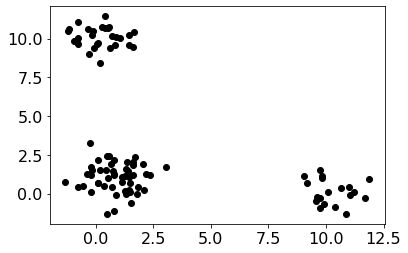

In [385]:
# This function has been referred from github. This will be used to visualize contours for the clusters
# and evaluate our EM algorithm output

def plot_contours(data, means, covs, title):
    plt.figure()
    plt.plot([x[0] for x in data], [y[1] for y in data],'ko')
    delta = 0.025
    k = len(means)
    x = np.arange(-2.0, 20.0, delta)
    y = np.arange(-2.0, 20.0, delta)
    X, Y = np.meshgrid(x, y)
    col = ['r', 'b', 'g']
    for i in range(k):
        mean = means[i]
        cov = covs[i]
        sigmax = np.sqrt(cov[0][0])
        sigmay = np.sqrt(cov[1][1])
        sigmaxy = cov[0][1]/(sigmax*sigmay)
        
        rv = multivariate_normal([mean[0], mean[1]], [[sigmax, sigmaxy], [sigmaxy, sigmay]])
        Z = rv.pdf(np.dstack((X, Y)))
        plt.contour(X, Y, Z, colors = col[i])
        plt.title(title)
    plt.rcParams.update({'font.size':16})
    plt.tight_layout()

# We generate data using a reference from github
def generate_MoG_data(num_data, means, covariances, weights):
    #Creates a list of spherical gaussian data points with 3 different clusters
    data = []
    for i in range(num_data):
        #  Use np.random.choice and weights to pick a cluster id greater than or equal to 0 and less than num_clusters.
        k = np.random.choice(len(weights), 1, p=weights)[0]

        # Use np.random.multivariate_normal to create data from this cluster
        x = np.random.multivariate_normal(means[k], covariances[k])

        data.append(x)
    return data

# Initial Model parameters
init_means = [
    [10, 0], # mean of cluster 1
    [1, 1], # mean of cluster 2
    [0, 10]  # mean of cluster 3
]
init_covariances = [
    [[.5, 0.], [0, .5]], # covariance of cluster 1
    [[.9, 0.], [0, .9]], # covariance of cluster 2
    [[.5, 0.], [0, .5]]  # covariance of cluster 3
]
init_weights = [1/4, 1/2, 1/4]  # weights of each cluster

# Generate data using the above model parameters
data = generate_MoG_data(100, init_means, init_covariances, init_weights)

# Plot this data
plt.figure()
d = np.vstack(data)
plt.plot(d[:,0], d[:,1],'ko')

## Initialize parameters and plot initial clusters

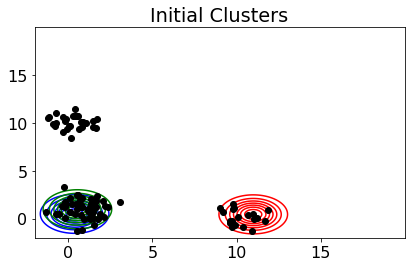

In [386]:
# Initialization of parameters for EM algorithm
random_samples = np.random.choice(len(data), 3, replace=False)
init_centroids = [data[i] for i in random_samples]
init_covs = [[[1,0],[0,1]]] * 3
init_w = [1/3.] * 3

# Parameters after initialization
plot_contours(data, init_centroids, init_covs, 'Initial Clusters')

## Run EM algorithm on this data and plot final clusters

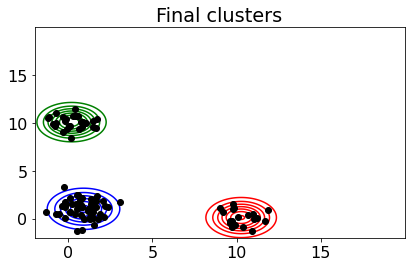

In [387]:
# Run EM and plot final clusters
w, means, covs, E = EM(np.array(data), np.array(init_means), np.array(init_covs), np.array(init_w))
plot_contours(data, means, covs, 'Final clusters')

-------------------------------------------- END OF ASSIGNMENT ------------------------------------